In [25]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 18
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')

# plt.rc('font', family='Arial', size=12)
# plt.rc('axes', titlesize=16, labelsize=14, grid=True)
plt.rc('lines', linewidth=2)
plt.rc('legend', fontsize=18, frameon=False)
plt.rc('xtick', labelsize=14, direction='in')
plt.rc('ytick', labelsize=14, direction='in')
plt.rc('figure', figsize=(6, 4), dpi=100)

In [26]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 100)  # Adjust this range as needed

for seed in seed_numbers:
    if seed == 0:
        dir_path = f"/home/zongchen/nest_bq/results/finance/seed_{seed}__complete/"
        files = os.listdir(dir_path)
        for file in files:
            if 'NKQ_QMC' in file:
                with open(dir_path + file, 'rb') as f:
                    I_nkq_qmc_err_dict = pickle.load(f)
                    I_nkq_qmc_values = np.array(list(I_nkq_qmc_err_dict.values()))[None, :]
            elif 'NMC_QMC' in file:
                with open(dir_path + file, 'rb') as f:
                    I_nmc_qmc_err_dict = pickle.load(f)
                    I_nmc_qmc_values = np.array(list(I_nmc_qmc_err_dict.values()))[None, :]
            elif 'NMC' in file:
                with open(dir_path + file, 'rb') as f:
                    I_nmc_err_dict = pickle.load(f)
                    I_nmc_values = np.array(list(I_nmc_err_dict.values()))[None, :]
            elif 'NKQ' in file:
                with open(dir_path + file, 'rb') as f:
                    I_nkq_err_dict = pickle.load(f)
                    I_nkq_values = np.array(list(I_nkq_err_dict.values()))[None, :]
            else:
                pass

    else:
        dir_path = f"/home/zongchen/nest_bq/results/finance/seed_{seed}__complete/"
        files = os.listdir(dir_path)    
        for file in files:
            if 'NKQ_QMC' in file:
                with open(dir_path + file, 'rb') as f:
                    I_nkq_qmc_err_dict = pickle.load(f)
                    I_nkq_qmc_values = np.concatenate((np.array(list(I_nkq_qmc_err_dict.values()))[None, :], I_nkq_qmc_values), axis=0)
            elif 'NMC_QMC' in file:
                with open(dir_path + file, 'rb') as f:
                    I_nmc_qmc_err_dict = pickle.load(f)
                    I_nmc_qmc_values = np.concatenate((np.array(list(I_nmc_qmc_err_dict.values()))[None, :], I_nmc_qmc_values), axis=0)
            elif 'NMC' in file:
                with open(dir_path + file, 'rb') as f:
                    I_nmc_err_dict = pickle.load(f)
                    I_nmc_values = np.concatenate((np.array(list(I_nmc_err_dict.values()))[None, :], I_nmc_values), axis=0)
            elif 'NKQ' in file:
                with open(dir_path + file, 'rb') as f:
                    I_nkq_err_dict = pickle.load(f)
                    I_nkq_values = np.concatenate((np.array(list(I_nkq_err_dict.values()))[None, :], I_nkq_values), axis=0)
            else:
                pass

# Convert lists to numpy arrays for easy computation
I_nkq_array = np.nan_to_num(np.array(I_nkq_values), nan=0)
I_nmc_array = np.nan_to_num(np.array(I_nmc_values), nan=0)
I_nkq_qmc_array = np.nan_to_num(np.array(I_nkq_qmc_values), nan=0)
I_nmc_qmc_array = np.nan_to_num(np.array(I_nmc_qmc_values), nan=0)


# Compute the median and standard deviation
I_nkq_median = np.median(I_nkq_array, axis=0)
I_nkq_q25 = np.percentile(I_nkq_array, 35, axis=0)
I_nkq_q75 = np.percentile(I_nkq_array, 65, axis=0)

I_nmc_median = np.median(I_nmc_array, axis=0)
I_nmc_q25 = np.percentile(I_nmc_array, 35, axis=0)
I_nmc_q75 = np.percentile(I_nmc_array, 65, axis=0)

I_nkq_qmc_median = np.median(I_nkq_qmc_array, axis=0)
I_nkq_qmc_q25 = np.percentile(I_nkq_qmc_array, 35, axis=0)
I_nkq_qmc_q75 = np.percentile(I_nkq_qmc_array, 65, axis=0)

I_nmc_qmc_median = np.median(I_nmc_qmc_array, axis=0)
I_nmc_qmc_q25 = np.percentile(I_nmc_qmc_array, 35, axis=0)
I_nmc_qmc_q75 = np.percentile(I_nmc_qmc_array, 65, axis=0)


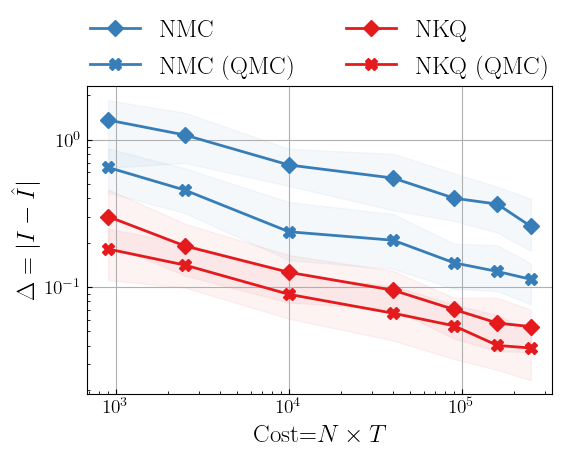

In [31]:
# Extract the keys
keys = list(I_nkq_err_dict.keys())
markersize = 8
linewidth = 2   
cmap = plt.get_cmap('Set1')


# Extract the unique values from the first and second elements of the keys
N_array = np.array(sorted(set([k[0] for k in keys])), dtype=float)
cost_array = N_array ** 2

rescale_nmc = 3.0

rescale_array_nkq = np.array([1.0, 1.0, 1.0, 1.5, 
                              1.5, 2.5, 2.5])

rescale_array_nkq_qmc = np.array([1.0, 1.0, 1.0, 1.0, 
                                  1.0, 1.0, 0.8])

rescale_array_nmc_qmc = np.array([1.0, 1.0, 1.0, 1.0, 
                                  1.0, 1.0, 0.8])

fig1 = plt.figure(figsize=(6, 4))
plt.grid(True)
plt.plot(cost_array, I_nmc_median * rescale_nmc, label=f'NMC', color=cmap.colors[1], linewidth=linewidth,
         marker='D', markersize=markersize)
plt.fill_between(cost_array, I_nmc_q25 * rescale_nmc, I_nmc_q75 * rescale_nmc, alpha=0.05, color=cmap.colors[1])
plt.plot(cost_array, I_nkq_median * rescale_array_nkq, label=f'NKQ', color=cmap.colors[0], linewidth=linewidth,
         marker='D', markersize=markersize)
plt.fill_between(cost_array, I_nkq_q25 * rescale_array_nkq, I_nkq_q75 * rescale_array_nkq, alpha=0.05, color=cmap.colors[0])

plt.plot(cost_array, I_nmc_qmc_median * rescale_nmc * rescale_array_nmc_qmc, label=f'NMC (QMC)', color=cmap.colors[1], linewidth=linewidth, 
         marker='X', markersize=markersize)
plt.fill_between(cost_array, I_nmc_qmc_q25 * rescale_nmc * rescale_array_nmc_qmc, 
                 I_nmc_qmc_q75 * rescale_nmc * rescale_array_nmc_qmc, alpha=0.05, color=cmap.colors[1])
plt.plot(cost_array, I_nkq_qmc_median * rescale_array_nkq_qmc, label=f'NKQ (QMC)', color=cmap.colors[0], linewidth=linewidth, 
         marker='X', markersize=markersize)
plt.fill_between(cost_array, I_nkq_qmc_q25 * rescale_array_nkq_qmc, I_nkq_qmc_q75 * rescale_array_nkq_qmc, alpha=0.05, color=cmap.colors[0])


plt.xlabel(r'Cost=$N \times T$')
plt.ylabel(r'$\Delta = |I - \hat{I}|$')
plt.yscale('log')
plt.xscale('log')

# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 2, 1, 3]
handles = [handles[o] for o in order]
labels = [labels[o] for o in order]

# Create a legend with reordered handles and labels
plt.legend(handles, labels, ncol=2, bbox_to_anchor=(0.5, 0.95), loc='lower center')
plt.savefig('../figures/finance.pdf', bbox_inches='tight')
plt.show()


In [28]:
I_nkq_qmc_q25

array([0.11125421, 0.0991539 , 0.06099405, 0.04328587, 0.03241732,
       0.02735264, 0.02910311], dtype=float32)